<a href="https://colab.research.google.com/github/suHtet28/DogBreed/blob/main/Copy2_of_Dog_Breed_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lime

In [ ]:
import os
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras import layers, models

## 2. Data Understanding

In [ ]:
device_name     = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir='/content/drive/MyDrive/Dog Breed Classification2/Train'
test_dir='/content/drive/MyDrive/Dog Breed Classification2/Test'

In [ ]:
os.listdir(train_dir+"/Corgi")

In [ ]:
os.listdir(test_dir+"/Pomeranian")

## 3. Data Preprocessing



In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

In [ ]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle = True
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle = False
)

## 4. Modeling

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_set.num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                3341      
                                                                 
Total params: 2589261 (9.88 MB)
Trainable params: 331277

In [ ]:
model.fit(train_set,
          epochs=100,
          verbose=2,
          shuffle = False)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3/3 - 14s - loss: 2.7200 - accuracy: 0.1644 - 14s/epoch - 5s/step
Epoch 2/100
3/3 - 2s - loss: 1.4615 - accuracy: 0.6301 - 2s/epoch - 524ms/step
Epoch 3/100
3/3 - 2s - loss: 0.7462 - accuracy: 0.8493 - 2s/epoch - 543ms/step
Epoch 4/100
3/3 - 2s - loss: 0.3651 - accuracy: 0.9178 - 2s/epoch - 521ms/step
Epoch 5/100
3/3 - 2s - loss: 0.2201 - accuracy: 0.9726 - 2s/epoch - 717ms/step
Epoch 6/100
3/3 - 3s - loss: 0.1468 - accuracy: 0.9452 - 3s/epoch - 838ms/step
Epoch 7/100
3/3 - 2s - loss: 0.0745 - accuracy: 0.9863 - 2s/epoch - 553ms/step
Epoch 8/100
3/3 - 2s - loss: 0.0464 - accuracy: 0.9863 - 2s/epoch - 529ms/step
Epoch 9/100
3/3 - 2s - loss: 0.0524 - accuracy: 0.9863 - 2s/epoch - 526ms/step
Epoch 10/100
3/3 - 2s - loss: 0.1301 - accuracy: 0.9726 - 2s/epoch - 539ms/step
Epoch 11/100
3/3 - 2s - loss: 0.0167 - accuracy: 1.0000 - 2s/epoch - 524ms/step
Epoch 12/100
3/3 - 2s - loss: 0.0235 - accuracy: 1.0000 - 2s/epoch - 589ms/step
Epoch 13/100
3/3 - 3s - loss: 0.0171 - accuracy: 1.0000 - 3s/e

## 5. Evaluation

In [ ]:
class_dictionary = test_set.class_indices
print('Labels dictionary',class_dictionary)

Labels dictionary {'Beagle': 0, 'Bernese Mountain Dog': 1, 'Chihuahua': 2, 'Corgi': 3, 'Dalmatian': 4, 'Doberman': 5, 'German Shepherd': 6, 'Golden Retriver': 7, 'Pomeranian': 8, 'Poodle': 9, 'Pug': 10, 'Rottweiler': 11, 'Siberian Husky': 12}


In [ ]:
y_predicted = model.predict(test_set)

3/3 [==============================] - 13s 6s/step


In [ ]:
y_predicted

In [ ]:
y_pred = []
for i in y_predicted:
  y_pred.append(np.argmax(i))

In [ ]:
y_pred

In [ ]:
y_test = test_set.classes.tolist()
y_test

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix')
print(confusion_matrix)

confusion_matrix
[[5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 9 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
print('Accuracy Score',accuracy_score(y_test,y_pred)*100,'%')
print('Precision Macro Score ',precision_score(y_test,y_pred,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_test,y_pred, average = 'macro')*100,'%')
print('F1_Score',f1_score(y_test,y_pred, average = 'macro')*100,'%')

Accuracy Score 94.66666666666667 %
Precision Macro Score  95.23809523809524 %
Recall_Score 94.61538461538463 %
F1_Score 94.1367112419744 %


## 6. LIME Explanation

In [ ]:
from tensorflow.keras.preprocessing import image

img_path='/content/drive/MyDrive/Dog Breed Classification2/Test/Corgi/Corgi test2.jpg'
specific_img= image.load_img(img_path, target_size=(224, 224, 3))

In [ ]:
def predict_fn(images):
  preprocessed_images = np.array([image.img_to_array(img) for img in images]) / 255.0
  return model.predict(preprocessed_images)

In [ ]:
explainer =lime_image.LimeImageExplainer()

In [ ]:
segmenter = SegmentationAlgorithm('quickshift', kernel_size=4, max_dis=150, ratio=0.2)

In [ ]:
explanation = explainer.explain_instance(
    np.array(specific_img),
    predict_fn,
    top_labels = 5,
    hide_color = 0,
    num_samples = 100,
    segmentation_fn = segmenter
)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


In [ ]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

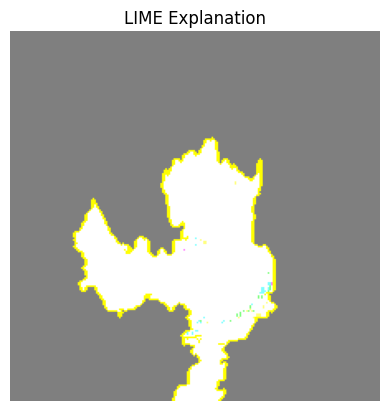

In [ ]:
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only = True,
    num_features = 5,
    hide_rest = True
)

plt.imshow(mark_boundaries(temp / 2+0.5, mask))
plt.axis('off')
plt.title('LIME Explanation')
plt.show()

## 6. Model Saving

In [ ]:
model.save('/content/drive/MyDrive/Dog Breed Classification.keras')

In [ ]:
saved_model=tf.keras.models.load_model('/content/drive/MyDrive/Dog Breed Classification.keras')

In [ ]:
saved_model.predict(test_set)

3/3 [==============================] - 3s 693ms/step


array([[9.99989152e-01, 2.56029494e-07, 5.55787381e-07, 7.60119065e-07,
        1.16918807e-06, 2.50125686e-06, 3.93065022e-07, 1.34808931e-06,
        7.39575285e-07, 2.50101357e-06, 4.31808829e-08, 2.52467686e-07,
        4.03526457e-07],
       [9.99867320e-01, 2.53798976e-06, 5.27201837e-06, 2.97047663e-05,
        2.68836393e-05, 1.24700928e-05, 2.87927810e-06, 2.33207666e-05,
        1.02485556e-05, 8.88289469e-06, 1.62928120e-06, 3.81875179e-06,
        5.14777594e-06],
       [9.99429524e-01, 5.96254313e-06, 2.27676137e-05, 6.71425587e-05,
        2.82627618e-04, 7.99075769e-06, 2.70193050e-06, 9.13643089e-05,
        2.59971130e-05, 3.28810165e-05, 5.91683147e-06, 6.79402046e-06,
        1.82771837e-05],
       [9.99833465e-01, 5.72880208e-06, 1.48705676e-05, 8.08732002e-05,
        2.47883127e-05, 3.95122424e-06, 1.64509438e-05, 7.01749229e-07,
        6.23489814e-06, 2.65001586e-06, 1.01270700e-06, 1.79676920e-06,
        7.46543492e-06],
       [9.99702275e-01, 9.40740938e-